In [52]:
import pandas as pd
import numpy as np
import _task1 as _task1
import time
import helper_functions as hf
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [53]:
def reductionAndSubset():
    ### READ IN THE 3 DATA SETS ###
    # dataset containing some information on atuoscout240-data/manufacture from the files
    dataset = _task1.preProcessingOfData()
    print("The Shape of Dataset:")
    print(dataset.shape)
    print("Dataset type usage description:")
    print(dataset.describe(exclude='number'))

In [54]:
reductionAndSubset()

=> Take a look at the first few rows
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


=> Header tbl:  mileage(analysed before), make,   model,  fuel,  gear, offerType,  price,   hp,  year
0    False
1    False
2    False
3    False
4    False
Name: make, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name: model, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name:

In [77]:
#Uniform Manifold Approximation and Projection (UMAP)
def uniformedApproximationAndProjection():
    dataset = _task1.preProcessingOfData()

    print("Data Reduction started for Main Data Set.")
    wanted_data_volume = ['mark', 'model','fuel','gear','offerType']
    print("Dimensionality reduction.")
    print(f"Wanted columns:\n {wanted_data_volume}")
    print("Data Reduction has been successfully reducted.\n")
    dataset = dataset[list(wanted_data_volume)]

    print("Subset Properties \nDropping same row vaules of new subset...")
    dataset = dataset.drop_duplicates(subset=wanted_data_volume,keep=False)

    print("Showing up the subset...")
    dataset.rename(columns={'DisplayName': 'Subset'},inplace=True)
    print(dataset)

filter = "COUNT > 500"
field_properties = "Field1 FLOAT true;Field2 STRING true;Field3 DOUBLE true"
file_extenstion = "csv"
has_header_row = True
file_encoding = "UTF-8"

def getOnlySomeColumnsFromDataSet():
    data = hf.readDataset()
    # generate gaussian data sample
    wanted_data_volume = ['price','year']
    data = data[list(wanted_data_volume)]
    data = data.drop_duplicates(subset=wanted_data_volume,keep=False)
    data.rename(columns={'DisplayName': 'Subset'},inplace=True)
    return data

def descritizationOfDataset():
    dataset = getOnlySomeColumnsFromDataSet()
    # summarize the shape of the dataset
    print(dataset.shape)
    # summarize each variable
    print(dataset.describe())
    # histograms of the variables
    dataset.hist()
    pyplot.show()
    
    # perform a k-means discretization transform of the dataset
    trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
    dataset = trans.fit_transform(dataset)
    


(9036, 2)
              price         year
count  9.036000e+03  9036.000000
mean   2.887730e+04  2017.301571
std    3.283298e+04     2.867084
min    1.100000e+03  2011.000000
25%    1.195000e+04  2015.000000
50%    2.079550e+04  2018.000000
75%    3.467175e+04  2020.000000
max    1.199900e+06  2021.000000


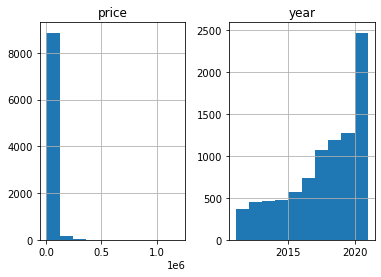

In [78]:
descritizationOfDataset()